In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
# Cleaning the data

In [156]:
def make_title_col(df):
    import re 
    idx=df.columns.tolist().index('Name')
    find=re.compile(r'(\w+)\.')
    titles=[find.search(i[idx]).groups()[0] for i in np.array(df) if find.search(i[idx])]
    titles=[i if i in ['Mr', 'Mrs', 'Miss', 'Master'] 
            else 'FancyM' if i in ['Don', 'Rev', 'Dr', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer'] 
            else 'FancyF' for i in titles]    
    ret=df.copy()
    ret['Title'] = np.array(titles)
    return ret

def impute_col(df, columns):
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(strategy='mean')
    tmp=df.copy()    
    tmp.loc[:,columns] = imp.fit_transform(tmp.loc[:, columns].values.reshape(-1,1)).tolist() 
    return tmp

def clean(df):
    tmp=df.copy()
    tmp=make_title_col(tmp)
   # tmp=tmp.groupby('Title').apply(lambda g: impute_col(g, 'Age'))
    tmp=tmp.reset_index(drop=True)
    tmp['Child']=[1 if i<10 else 0 for i in tmp['Age']]
    tmp.drop(columns=['Name', 'PassengerId', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass', 'Child'], inplace=True)
    tmp=pd.get_dummies(tmp, columns=['Title'])
    return tmp

def clean_train(df):
    return clean(df.drop(columns=['Survived']))

def clean_test(df):
    return clean(df)

train=pd.read_csv('data/train.csv')
train=clean_train(train)

In [173]:
def model(X, y):
    from sklearn.neighbors import KNeighborsClassifier as Model
    from sklearn.model_selection import cross_val_score as cv

    results=[]
    
    for i in ['uniform', 'distance']:
        for k in range(5,10):
            knn=Model(n_neighbors=k, weights=i)
            results.append((knn, sum(cv(knn, X, y, cv=15))/15))
    
    results = sorted(results, key=lambda i: i[1], reverse=True)
    
    return results[0][0].fit(X,y)

In [212]:
def submit(model, filename):
    test=pd.read_csv(filename)
    ids=test[['PassengerId']]
    test=clean_test(test) 
    predictions=pd.DataFrame(model.predict(test))
    predictions.columns=['Survived']
    df=pd.concat([ids, predictions], axis=1)
    df.to_csv('submission.csv', index=False)

In [214]:
# Clean the data

train=pd.read_csv('data/train.csv')
train_y=train['Survived'].values
train=clean_train(train)
knn=model(train, train_y)
submit(knn, 'data/test.csv')

# Cleaning the Data

## Importing the data

In [192]:
titanic = pd.read_csv('data/train.csv')
titanic.describe(include='all').drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


### Missing data?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


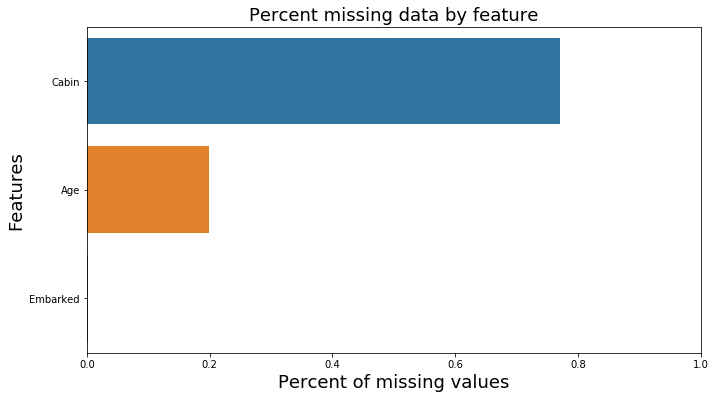

In [193]:
def nullstat(dataset):
    total=dataset.isnull().sum().sort_values(ascending=False)
    percent=(dataset.isnull().sum()/dataset.isnull().count()) \
        .sort_values(ascending=False)
    missing_data=pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    missing_data=missing_data[missing_data.Percent != 0]
    f, ax = plt.subplots(figsize=(11, 6))
    sns.barplot(y=missing_data.index, x=missing_data['Percent'], orient='h')
    plt.ylabel('Features', fontsize=18)
    plt.xlabel('Percent of missing values', fontsize=18)
    plt.title('Percent missing data by feature', fontsize=18)
    plt.xlim([0.0, 1.0])

nullstat(titanic)
titanic.drop(columns=['Ticket', 'Cabin'], inplace=True)
titanic.head()

Stone, Mrs. George Nelson (Martha Evelyn) and her Maid Icard Miss. Amelie, embarked in Southampton<sup>1</sup>

<sup>1</sup>(2019) Martha Evelyn Stone Encyclopedia Titanica (ref: #287, updated 18th June 2019 06:25:53 AM)
URL : https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [194]:
titanic.at[829, 'Embarked'] = 'S'
titanic.at[61, 'Embarked'] = 'S'

### Name Column

Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)


[82, 67, 65, 61, 57]

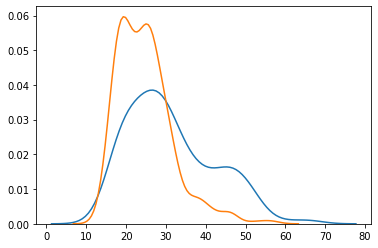

In [195]:
import random as rand
print(max(titanic['Name'], key=len))
sname_lengths=[len(i) for i in titanic[titanic.Survived==1]['Name']]
dname_lengths=[len(i) for i in titanic[titanic.Survived==0]['Name']]
display(sorted(map(len, titanic['Name'].to_list()), reverse=True)[0:5])
sns.distplot(rand.sample(sname_lengths, 3*len(sname_lengths)//4), bins=15, hist=False);
sns.distplot(rand.sample(dname_lengths, 3*len(dname_lengths)//4), bins=15, hist=False);

In [196]:
titanic=make_title_col(titanic)

In [197]:
title_stats=[]
for title in titles:
    title_match=re.compile(title + r'\.')
    matches=np.array([i for i in np.array(titanic) if title_match.search(i[3])])
    survived=sum(matches.T[1])
    count=len(matches)    
    title_stats.append({'Title':title, 'Count':count, 'Survival Rate':survived/count})


title_stats=pd.DataFrame(sorted(title_stats, key=lambda i: i['Count'], reverse=True)).T
title_stats.columns=title_stats.T['Title']
title_stats=title_stats.T.drop(columns='Title')[['Survival Rate', 'Count']].T
title_stats

NameError: name 'titles' is not defined

In [198]:
for name, group in titanic.groupby('Title'):
        with open("title_stats.txt", "w") as f:
            f.write(name + '\n' + str(group.describe(include='all')) + '\n')